### Data

In [1]:
df_users = pd.read_pickle('data/df_users.pkl').fillna(0)
print(df_users.shape)
df_users[:3]

(9025, 12)


,Author,Date_joined,Date_first,Date_diff,cnt_messages,cnt_reactions,cnt_attachments,cnt_words,cnt_chars,Date_day,Channel2,flg_bot
0,! GD┘áShaibi#3385,2022-07-06 05:43:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
1,! Reko .#6689,2022-07-08 19:47:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
2,! SΓêåM#2947,2022-07-06 05:43:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0


In [2]:
df_users2 = pd.read_pickle('data/df_users2.pkl').fillna(0)
print(df_users2.shape)
df_users2[:3]

(9025, 14)


,Author,w_1,w_2,w_3,w_4,w_5,w_6,w_7,h0_4,h5_8,h9_12,h12_16,h17_20,h21_24
0,! GD┘áShaibi#3385,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,! Reko .#6689,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,! SΓêåM#2947,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


### Rankings

In [3]:
# active users
f1 = df_users.cnt_words > 0
f2 = df_users.flg_bot == 0
filt = f1&f2
df_users[filt].shape

(2924, 12)

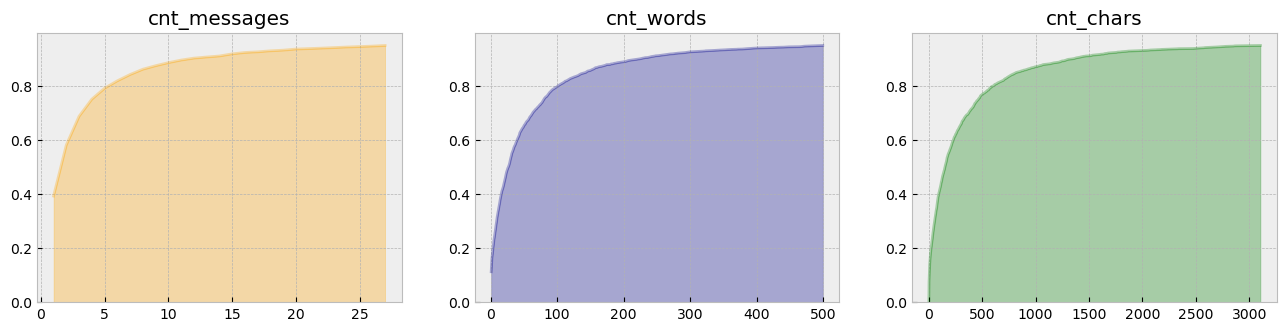

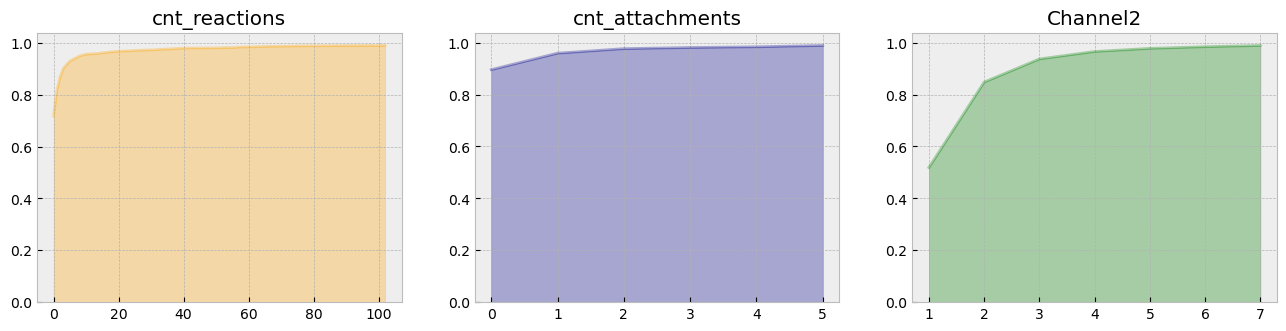

In [4]:
# numeric features distributions
colors = ['orange','darkblue','green']

_, ax = plt.subplots(1,3, figsize = (16,3.5))
for i,f in enumerate(['cnt_messages', 'cnt_words', 'cnt_chars']):
    x = df_users[filt][f].value_counts(normalize = True).sort_index().cumsum()
    _ = x[x < 0.95].plot(ax = ax[i], kind = 'area', alpha = 0.3, color = colors[i], title = f, xlabel = '')
# plt.tight_layout()
   
_, ax = plt.subplots(1,3, figsize = (16,3.5))
for i,f in enumerate(['cnt_reactions', 'cnt_attachments','Channel2']):
    x = df_users[filt][f].value_counts(normalize = True).sort_index().cumsum()
    _ = x[x < 0.99].plot(ax = ax[i], kind = 'area', alpha = 0.3, color = colors[i], title = f, xlabel = '')    
# plt.tight_layout()


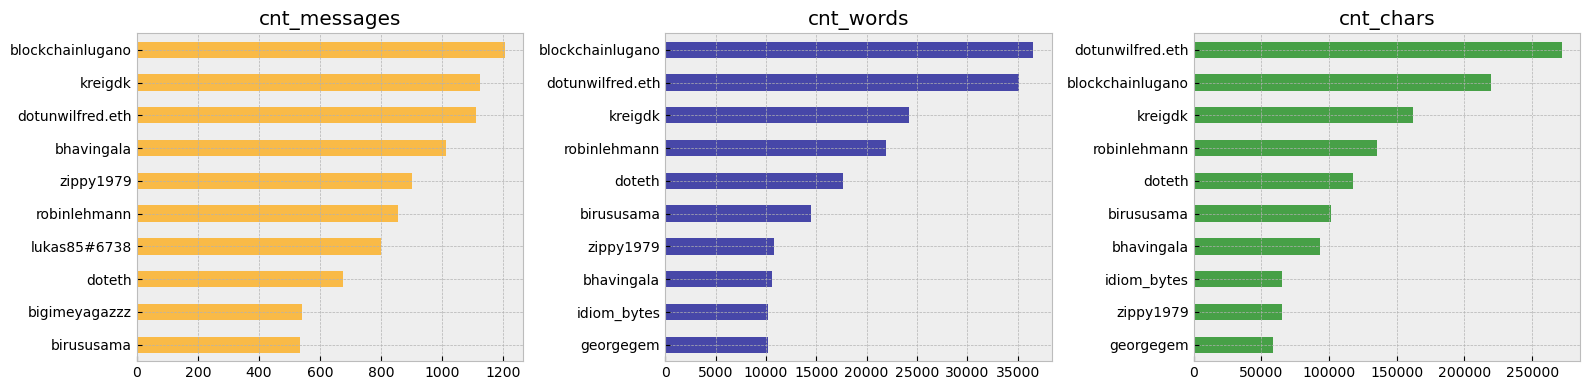

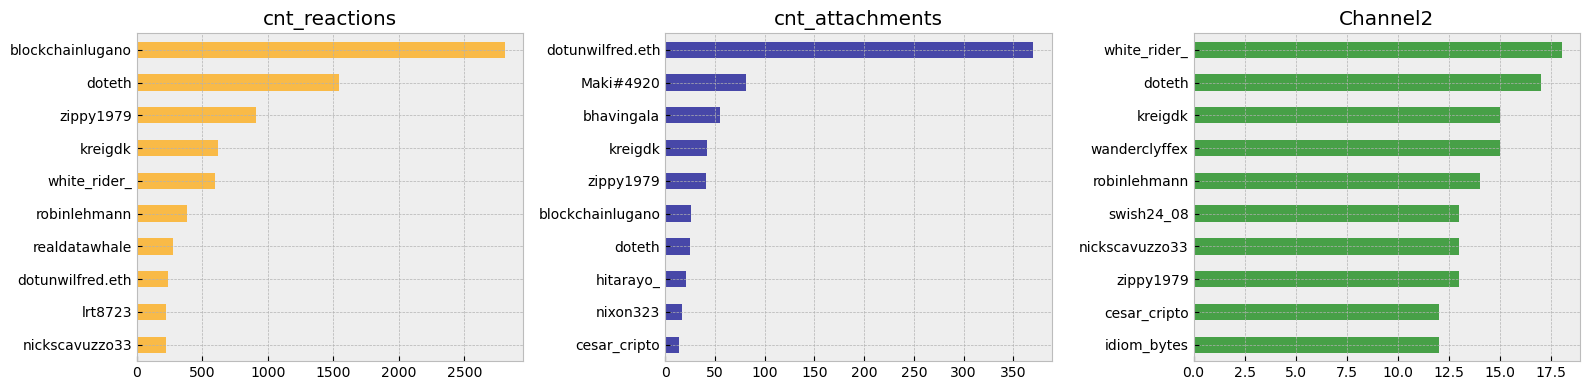

In [8]:
# TOP rankings
colors = ['orange','darkblue','green']

_, ax = plt.subplots(1,3, figsize = (16,4))
for i,f in enumerate(['cnt_messages', 'cnt_words', 'cnt_chars']):
    x = df_users[filt].sort_values(f, ascending = False).set_index('Author')[f]
    _ = x[:10].sort_values().plot(ax = ax[i], kind = 'barh', alpha = 0.7, color = colors[i], title = f, ylabel = '')
plt.tight_layout()

_, ax = plt.subplots(1,3, figsize = (16,4))
for i,f in enumerate(['cnt_reactions', 'cnt_attachments','Channel2']):
    x = df_users[filt].sort_values(f, ascending = False).set_index('Author')[f]
    _ = x[:10].sort_values().plot(ax = ax[i], kind = 'barh', alpha = 0.7, color = colors[i], title = f, ylabel = '')
plt.tight_layout()

### Clustering

In [15]:
# active users
f1 = df_users.cnt_words > 100
f2 = df_users.flg_bot == 0
filt = f1&f2
list_users = list(df_users[filt]['Author'])
print(len(list_users))

df_users3 = df_users2.set_index('Author').loc[list_users]
print(df_users3.shape)
df_users3[:3]

593
(593, 13)


,w_1,w_2,w_3,w_4,w_5,w_6,w_7,h0_4,h5_8,h9_12,h12_16,h17_20,h21_24
Author,,,,,,,,,,,,,
.alpha_12,0.75,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.07,0.00,0.01,0.92,0.00
.anatix,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
.ankhenaten,0.00,0.00,0.00,0.88,0.00,0.12,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [20]:
# Kmeans clustering
from sklearn.cluster import KMeans
np.random.seed(2017)
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_users3)
df_users3['cluster'] = kmeans.labels_

In [28]:
dict_repl = {0:0,1:5,2:3,3:4,4:2,5:1}
df_users3['cluster'] = df_users3['cluster'].map(dict_repl)

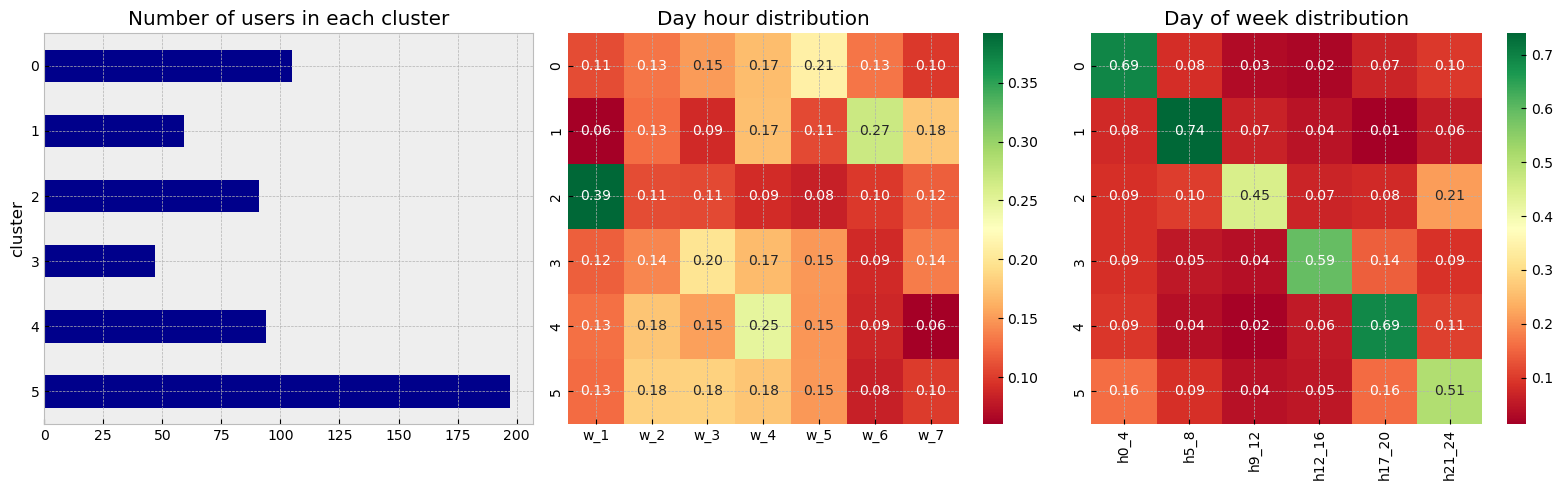

In [32]:
# plot clusters
df3 = df_users3.groupby('cluster').mean()   

_, ax = plt.subplots(1,3, figsize = (16,5))

df_users3.cluster.value_counts().sort_index(ascending = False).plot(color = 'darkblue', kind = 'barh', ax = ax[0], title = 'Number of users in each cluster')

_ = sns.heatmap(df3.iloc[:,:7], ax = ax[1], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 10})
_ = ax[1].set_title('Day hour distribution')
_ = ax[1].set_ylabel('')

_ = sns.heatmap(df3.iloc[:,7:], ax = ax[2], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 10})
_ = ax[2].set_title('Day of week distribution')
_ = ax[2].set_ylabel('')

plt.tight_layout()

In [33]:
df_users

,Author,Date_joined,Date_first,Date_diff,cnt_messages,cnt_reactions,cnt_attachments,cnt_words,cnt_chars,Date_day,Channel2,flg_bot
0,! GD┘áShaibi#3385,2022-07-06 05:43:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
1,! Reko .#6689,2022-07-08 19:47:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
2,! SΓêåM#2947,2022-07-06 05:43:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
3,! ajjaxx.xp#8310,2022-07-05 21:50:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
4,! Arii#5937,2022-07-05 21:41:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9020,🚨❓ FAQ | queries#8727,2021-09-03 02:20:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
9021,🚨❓ FAQ | queries#9354,2021-10-02 22:38:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
9022,🚨❓FAQ | queries#3602,2021-05-09 03:10:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
9023,🛎Support|FAQ#9746,2021-06-28 20:48:00,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0


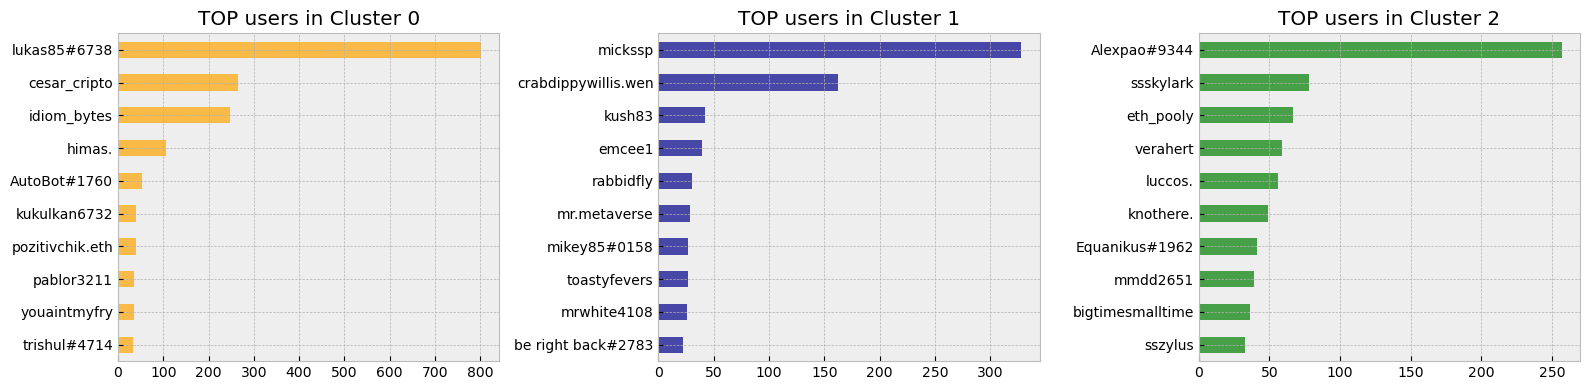

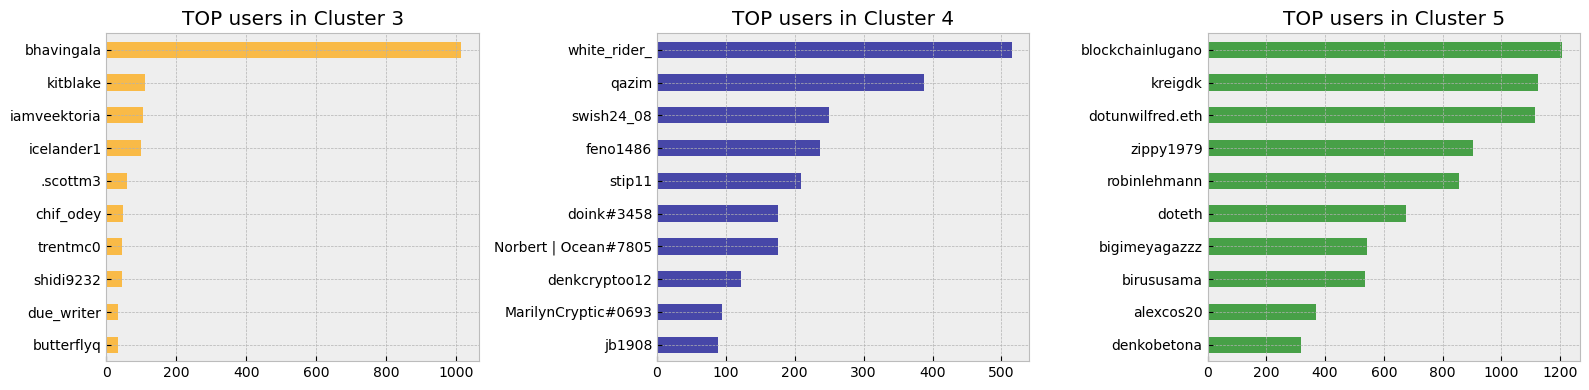

In [44]:
# TOP rankings
colors = ['orange','darkblue','green']
f = 'cnt_messages'

_, ax = plt.subplots(1,3, figsize = (16,4))
for i in [0,1,2]:
    list1 = list(df_users3[df_users3.cluster == i].index)
    f1 = df_users['Author'].isin(list1)
    x = df_users[f1].sort_values(f, ascending = False).set_index('Author')[f]
    _ = x[:10].sort_values().plot(ax = ax[i], kind = 'barh', alpha = 0.7, color = colors[i], title = f'TOP users in Cluster {i}', ylabel = '')
plt.tight_layout()

_, ax = plt.subplots(1,3, figsize = (16,4))
for i in [3,4,5]:
    list1 = list(df_users3[df_users3.cluster == i].index)
    f1 = df_users['Author'].isin(list1)
    x = df_users[f1].sort_values(f, ascending = False).set_index('Author')[f]
    _ = x[:10].sort_values().plot(ax = ax[i-3], kind = 'barh', alpha = 0.7, color = colors[i-3], title = f'TOP users in Cluster {i}', ylabel = '')
plt.tight_layout()